<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/Cluster_Members_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for downloading file
from google.colab import files

import pprint

In [2]:
all_members = pd.read_csv('all_possible_members.csv', index_col=0).drop(columns = 'Unnamed: 0.1')

In [3]:
all_members.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb,dataset,cluster,dist_1893_center,dist_2244_center,dist_2264_center,dist_3293_center,dist_6231_center,dist_6823_center,dist_6913_center,dist_1805_center
0,1635721458409799680,Gaia DR2 509862169090117760,509862169090117760,1567358488,2015.5,23.375725,0.018781,60.655433,0.022554,0.270284,0.032523,8.310554,-0.810713,0.031406,-0.368054,0.045238,-0.253532,0.106947,-0.483173,0.101907,-0.157338,0.065012,-0.239009,-0.155671,0.250385,-0.473880,439,439,422,17,17.474090,1151.25670,0.00000,2.747630e-15,31,False,356.677000,1.693831,0.005462,-0.021357,...,NOT_AVAILABLE,128.066018,-1.796315,49.415880,46.254335,100001.0,8427.5,8147.0000,8951.2500,0.9225,0.7659,1.2101,0.443,0.3687,0.6061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.015617,25.814100,8.136013,0.015624,1,0.591706,New_member,NGC_581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1635721458409799680,Gaia DR2 509864432526709888,509864432526709888,814202072,2015.5,23.366462,0.061141,60.680181,0.074319,0.377205,0.108771,3.467881,-1.181280,0.104553,-0.163178,0.141974,-0.215518,0.106881,-0.474378,0.063444,-0.077086,-0.005553,-0.198786,-0.080156,0.176167,-0.447807,429,9,428,1,0.706950,443.20930,0.00000,1.933852e-15,31,False,1.475491,1.448076,0.017288,-0.037219,...,NOT_AVAILABLE,128.057516,-1.772634,49.429213,46.277746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.031825,11.298411,1.149351,0.031826,1,0.830878,New_member,NGC_581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1635721458409799680,Gaia DR2 509862134730520704,509862134730520704,152456297,2015.5,23.431436,0.073039,60.645933,0.091509,0.465812,0.128921,3.613161,-1.584779,0.123262,-0.729008,0.179898,-0.315831,0.247755,-0.381997,0.065043,-0.123756,0.019278,-0.182988,-0.150982,0.168254,-0.534846,426,0,423,3,0.699134,437.85416,0.00000,0.000000e+00,31,False,1.003761,1.495908,0.021696,0.005092,...,NOT_AVAILABLE,128.094521,-1.801239,49.442163,46.231853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.042148,12.856982,4.052337,0.042159,1,0.865941,New_member,NGC_581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1635721458409799680,Gaia DR2 509862547046963584,509862547046963584,221514780,2015.5,23.262949,0.034233,60.626459,0.039818,0.296704,0.064558,4.595961,-0.534677,0.056238,-0.103247,0.073189,-0.341882,0.296512,-0.424191,0.104127,-0.256787,0.002394,-0.054628,-0.174148,0.215036,-0.530756,469,0,467,2,-0.482650,446.83118,0.00000,0.000000e+00,31,False,4.606903,1.538900,0.009398,-0.042787,...,NOT_AVAILABLE,128.016112,-1.833847,49.325844,46.258946,100001.0,4916.0,4852.6665,5008.9697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.046973,9.507466,1.410685,0.046979,1,0.583345,New_member,NGC_581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16357214584097996

In [4]:
len(all_members)

15250

In [5]:
clusters = ['NGC_581', 'NGC_1893', 'NGC_2244', 'NGC_2264', 'NGC_3293', 'NGC_6231', 'NGC_6823', 'NGC_6913', 'IC_1805']


In [6]:
members = [all_members[all_members.cluster == cluster] for cluster in clusters]

In [7]:
[members[i].cluster.value_counts() for i in range(9)]

[NGC_581    815
 Name: cluster, dtype: int64, NGC_1893    992
 Name: cluster, dtype: int64, NGC_2244    4235
 Name: cluster, dtype: int64, NGC_2264    693
 Name: cluster, dtype: int64, NGC_3293    1706
 Name: cluster, dtype: int64, NGC_6231    4073
 Name: cluster, dtype: int64, NGC_6823    524
 Name: cluster, dtype: int64, NGC_6913    678
 Name: cluster, dtype: int64, IC_1805    1534
 Name: cluster, dtype: int64]

In [8]:
all_members.cluster.value_counts()

NGC_2244    4235
NGC_6231    4073
NGC_3293    1706
IC_1805     1534
NGC_1893     992
NGC_581      815
NGC_2264     693
NGC_6913     678
NGC_6823     524
Name: cluster, dtype: int64

In [9]:
all_members.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'dataset', 'cluster', 'dist_1893_center', 'dist_2244_center',
       'dist_2264_center', 'dist_3293_center', 'dist_6231_center',
       'dist_6823_center', 'dist_6913_center', 'dist_1805_center'],
      dtype='object', length=112)

In [11]:
pprint.pprint([(np.unique(members[i].cluster), members[i].dataset.value_counts()) for i in range(9)])

[(array(['NGC_581'], dtype=object),
  New_member    525
Old_member    290
Name: dataset, dtype: int64),
 (array(['NGC_1893'], dtype=object),
  New_member    774
Old_member    218
Name: dataset, dtype: int64),
 (array(['NGC_2244'], dtype=object),
  New_member    3043
Old_member    1192
Name: dataset, dtype: int64),
 (array(['NGC_2264'], dtype=object),
  New_member    514
Old_member    179
Name: dataset, dtype: int64),
 (array(['NGC_3293'], dtype=object),
  New_member    1089
Old_member     617
Name: dataset, dtype: int64),
 (array(['NGC_6231'], dtype=object),
  New_member    2719
Old_member    1354
Name: dataset, dtype: int64),
 (array(['NGC_6823'], dtype=object),
  New_member    304
Old_member    220
Name: dataset, dtype: int64),
 (array(['NGC_6913'], dtype=object),
  New_member    508
Old_member    170
Name: dataset, dtype: int64),
 (array(['IC_1805'], dtype=object),
  New_member    1104
Old_member     430
Name: dataset, dtype: int64)]


In [13]:
old_members = [members[i][members[i].dataset == 'Old_member'] for i in range(9)]
new_members = [members[i][members[i].dataset == 'New_member'] for i in range(9)]

In [16]:
[old_members[i].cluster.value_counts() for i in range(9)]

[NGC_581    290
 Name: cluster, dtype: int64, NGC_1893    218
 Name: cluster, dtype: int64, NGC_2244    1192
 Name: cluster, dtype: int64, NGC_2264    179
 Name: cluster, dtype: int64, NGC_3293    617
 Name: cluster, dtype: int64, NGC_6231    1354
 Name: cluster, dtype: int64, NGC_6823    220
 Name: cluster, dtype: int64, NGC_6913    170
 Name: cluster, dtype: int64, IC_1805    430
 Name: cluster, dtype: int64]

#### Visulization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

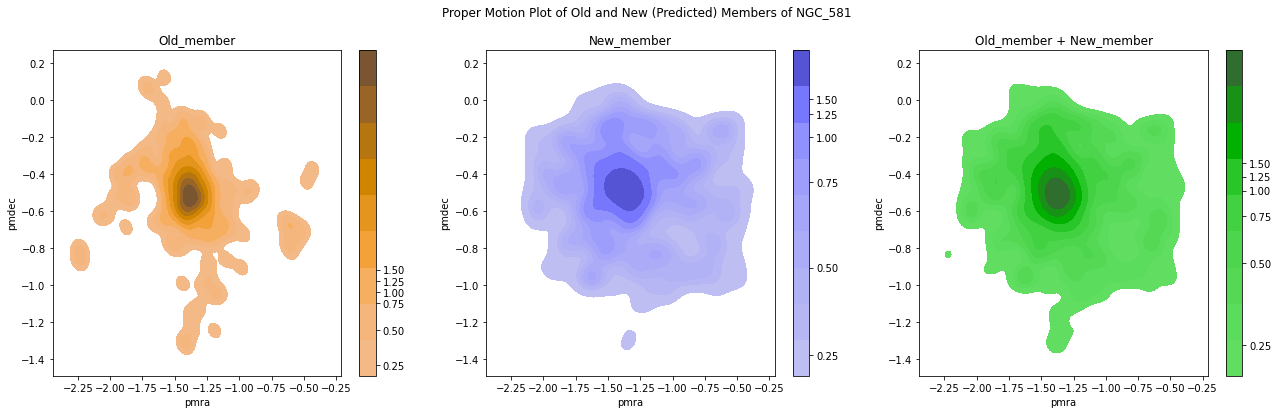

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

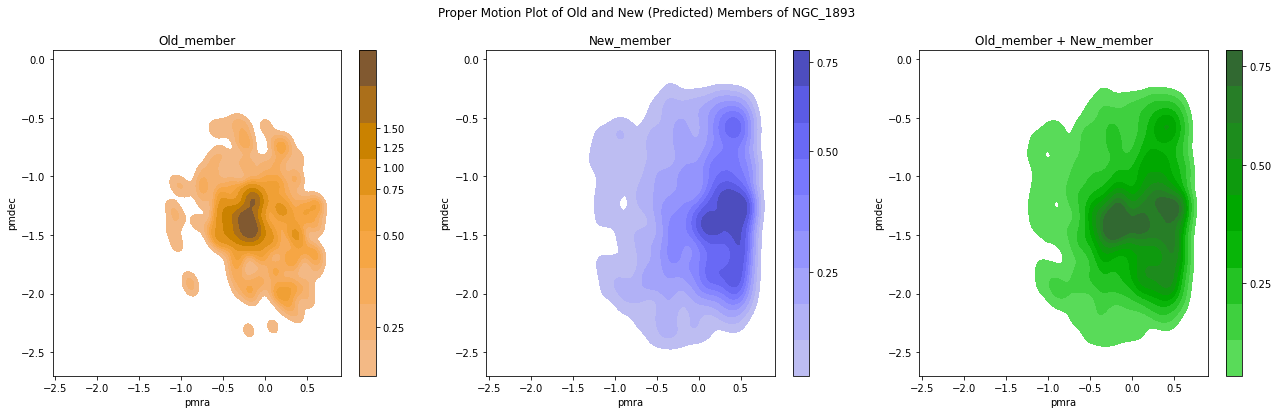

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

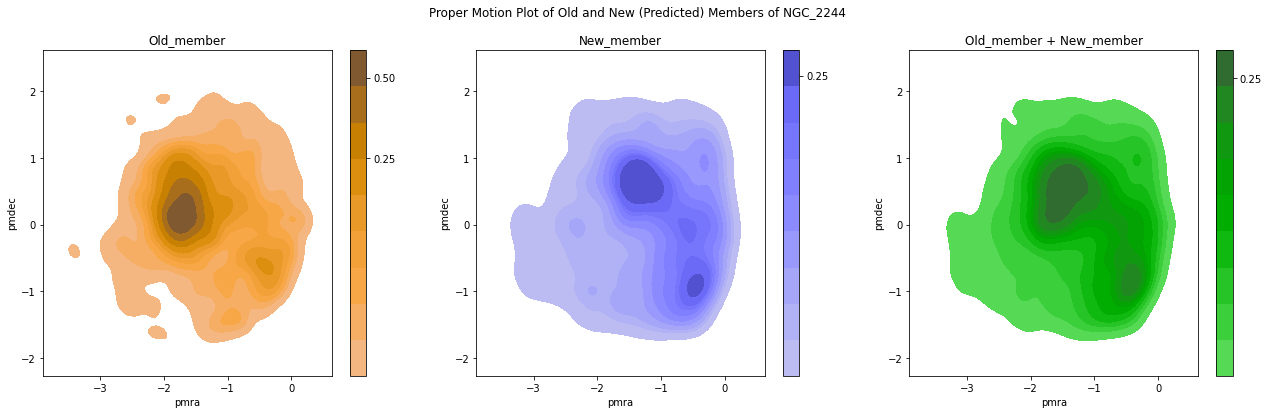

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

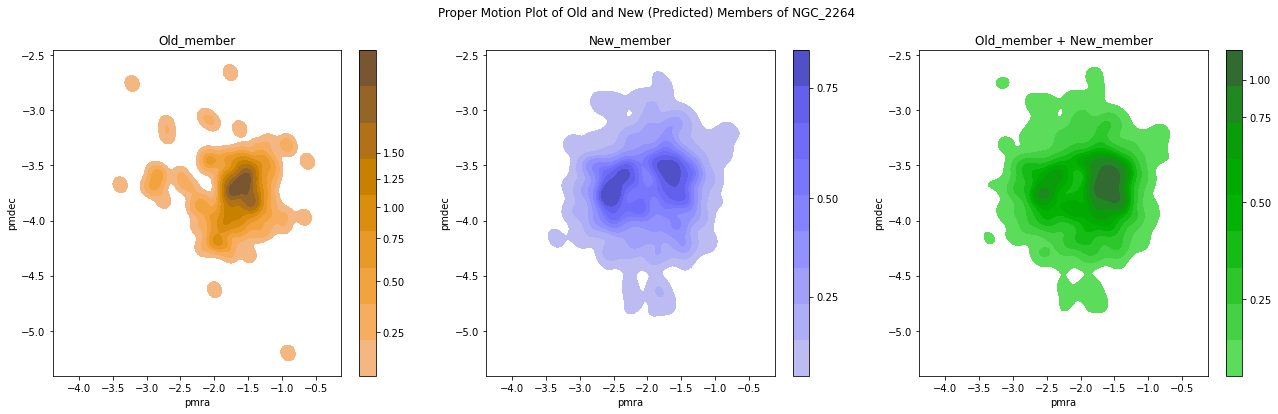

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

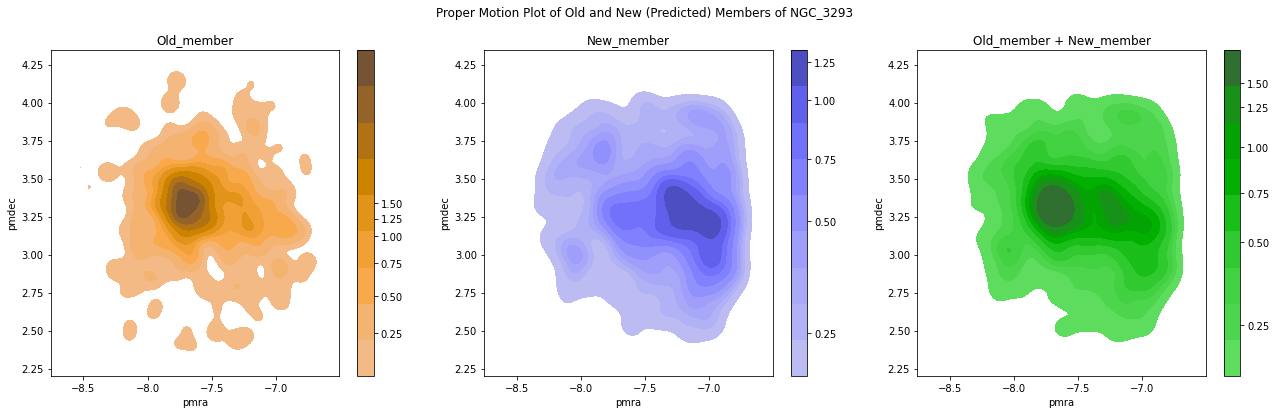

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

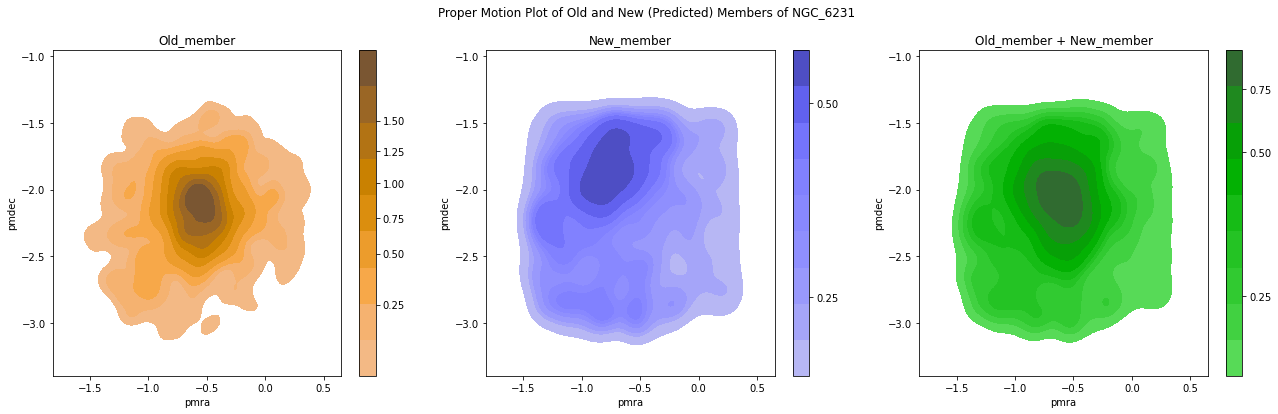

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

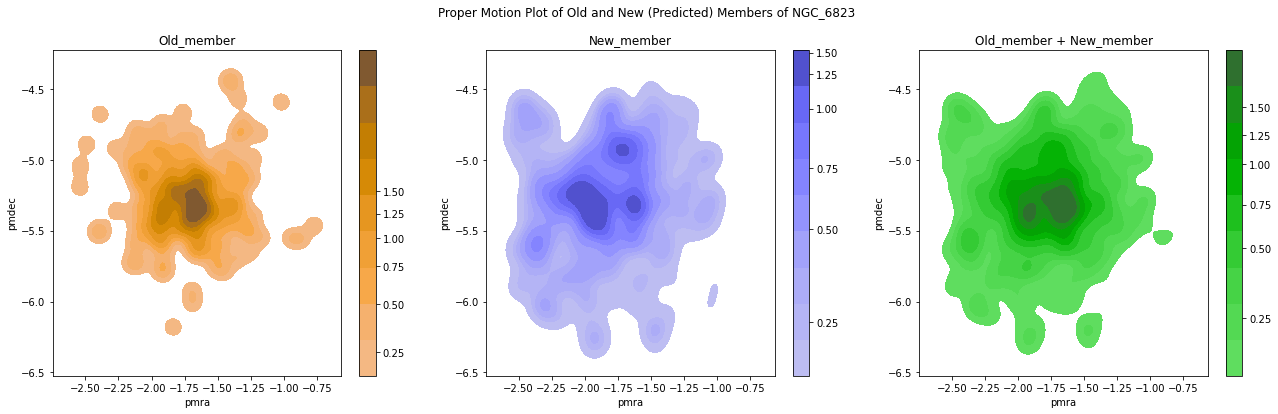

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

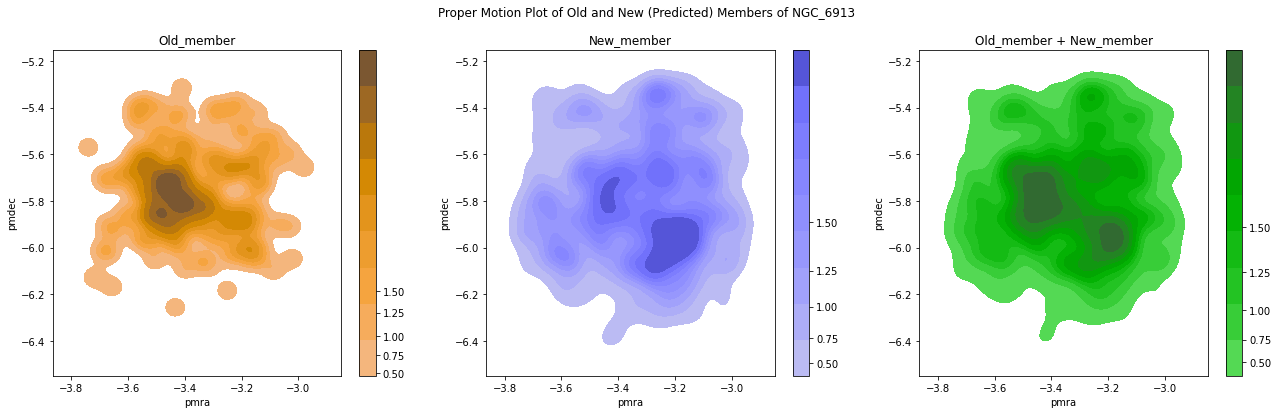

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

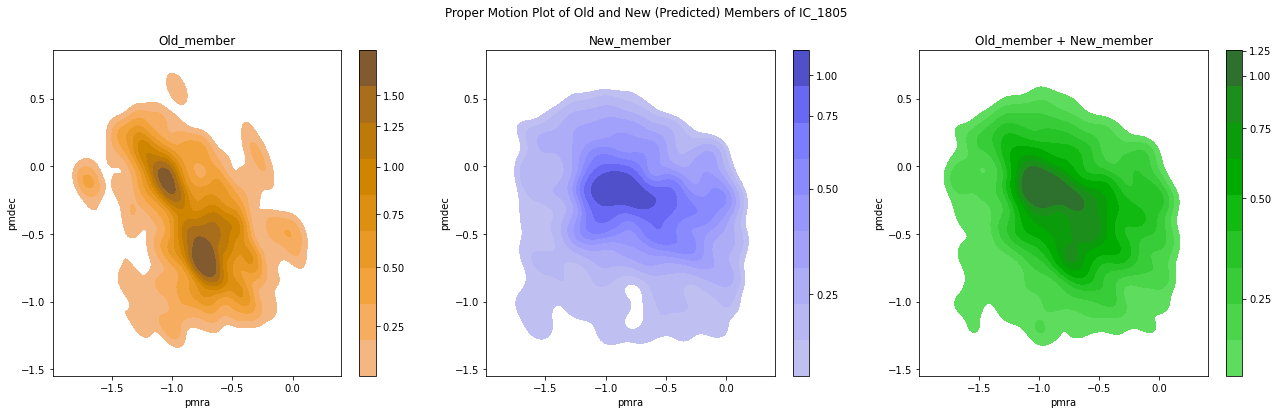

In [55]:
## Proper motion plot
for i in range(9):
    fig, axes = plt.subplots(1, 3, figsize=(22,6))
    fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of '+clusters[i])
    
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[0], cbar_kws = cbar_kws)
    axes[0].set_title('Old_member')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[1], cbar_kws = cbar_kws)
    axes[1].set_title('New_member')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[2], cbar_kws = cbar_kws)
    axes[2].set_title('Old_member + New_member')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
    plt.savefig('pmplot_'+ clusters[i]+'.png')
    files.download('pmplot_'+ clusters[i]+'.png')
    plt.show()

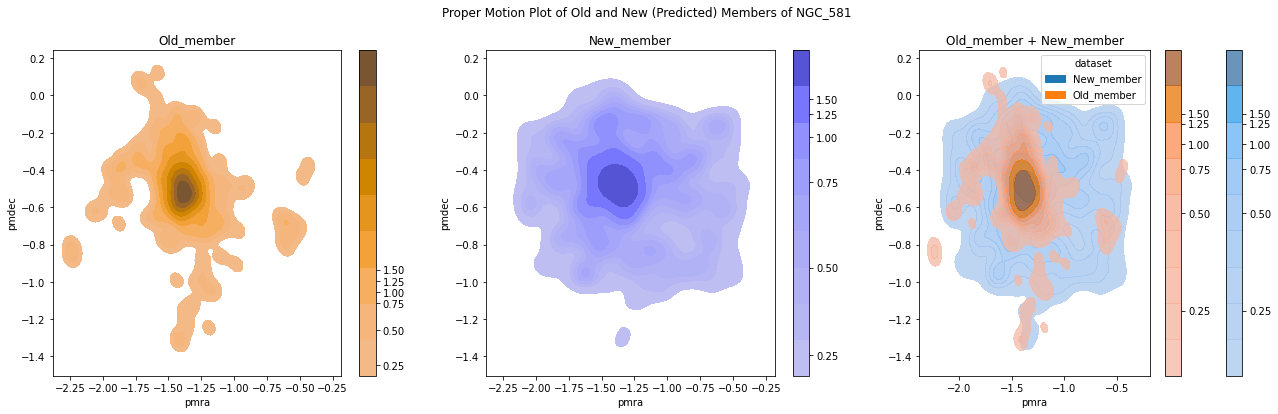

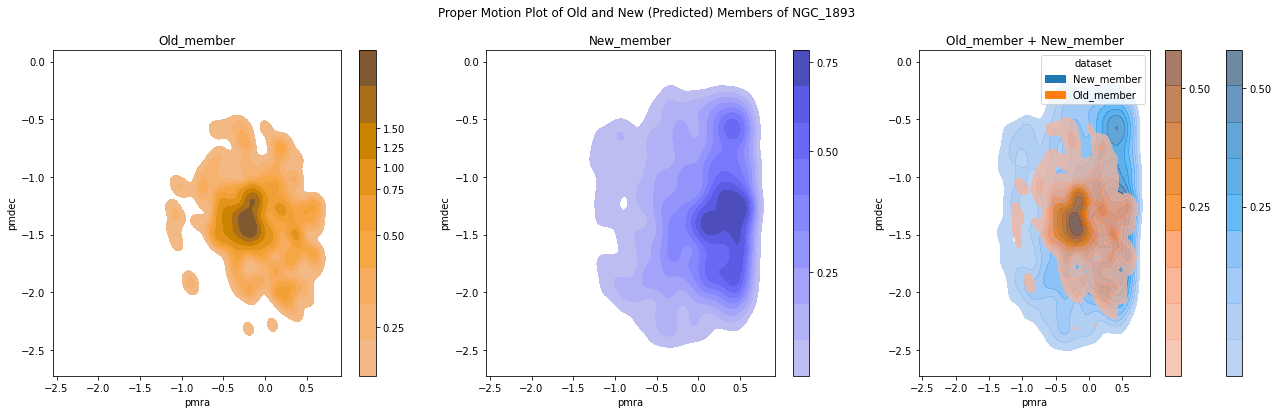

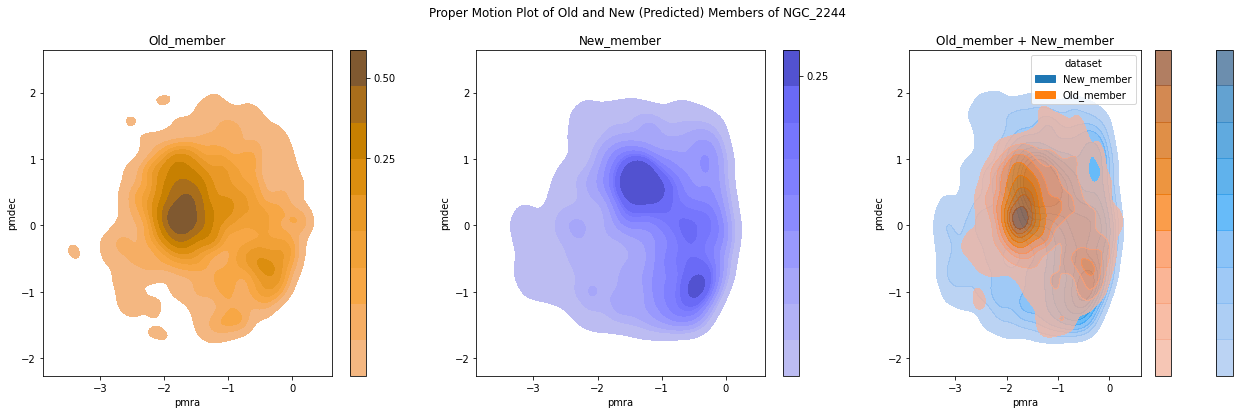

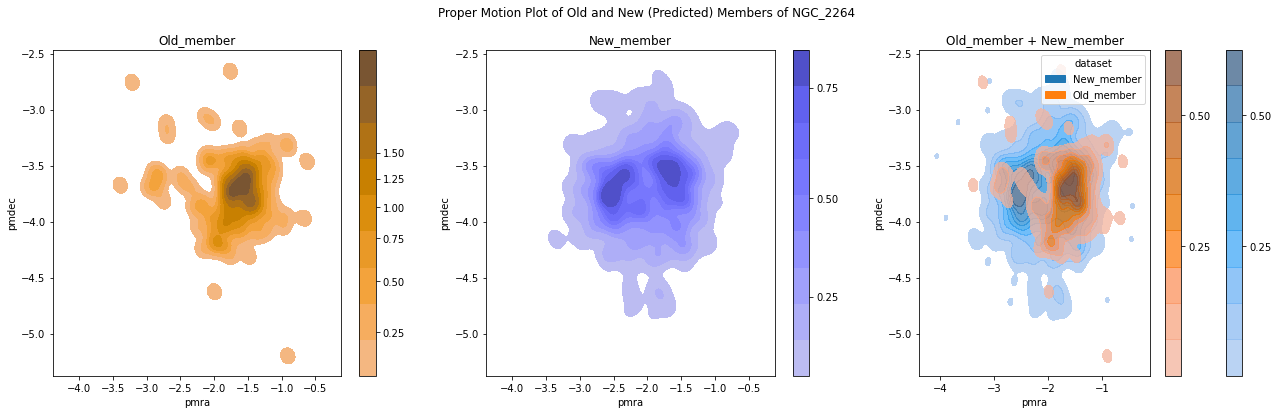

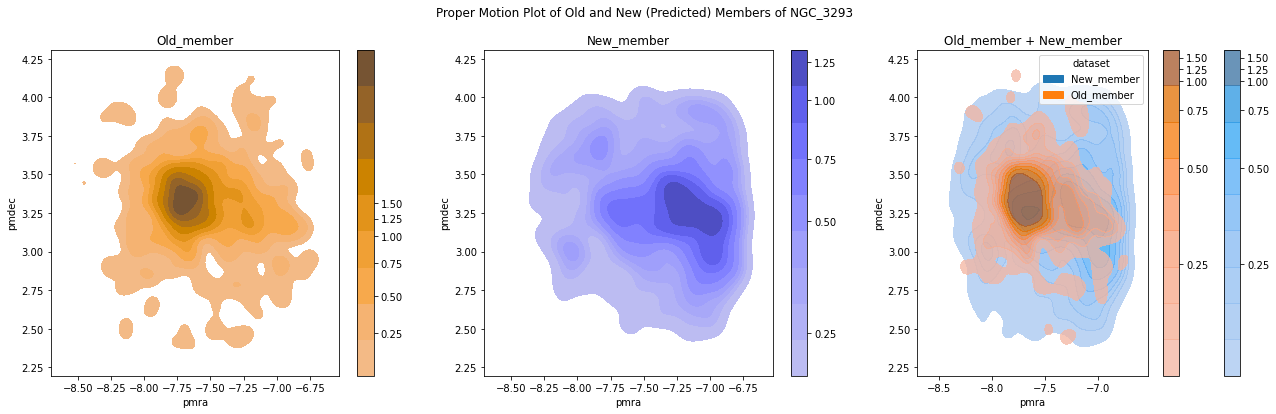

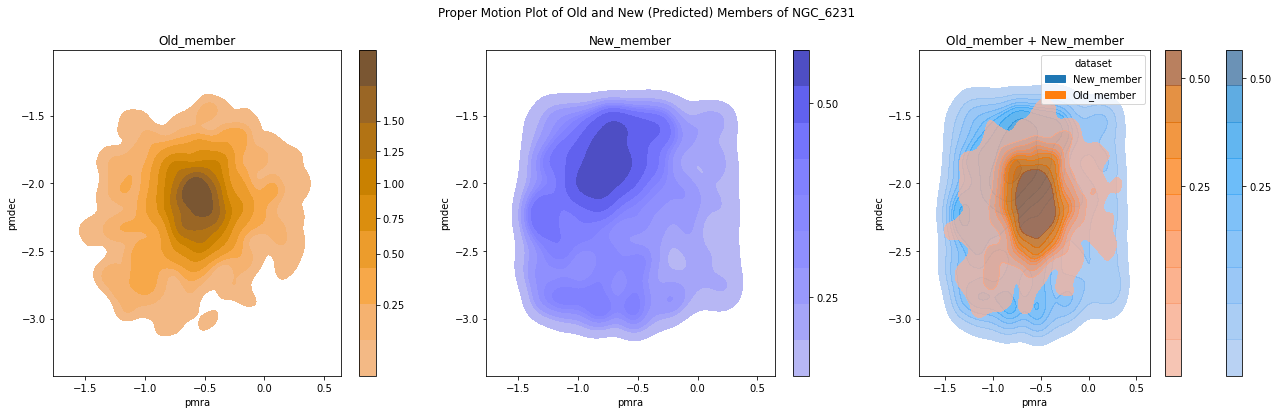

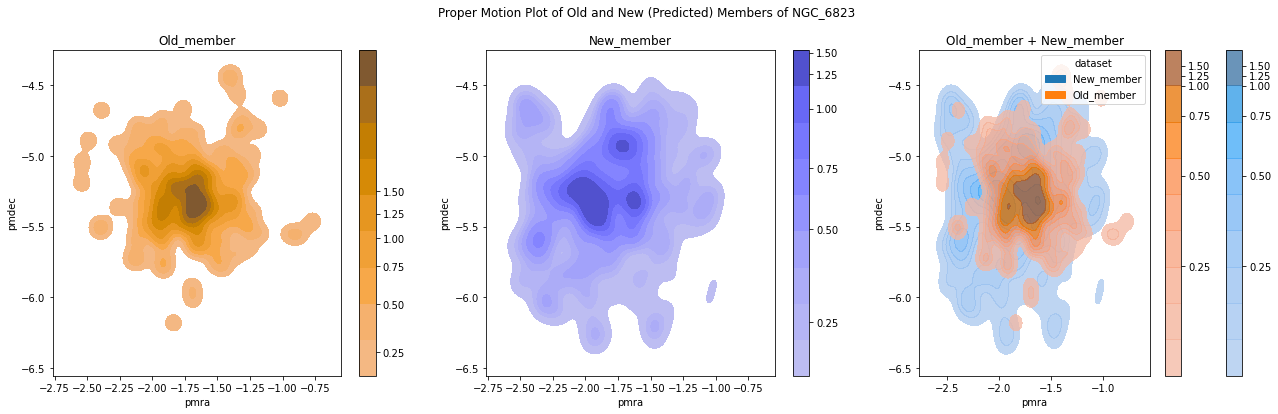

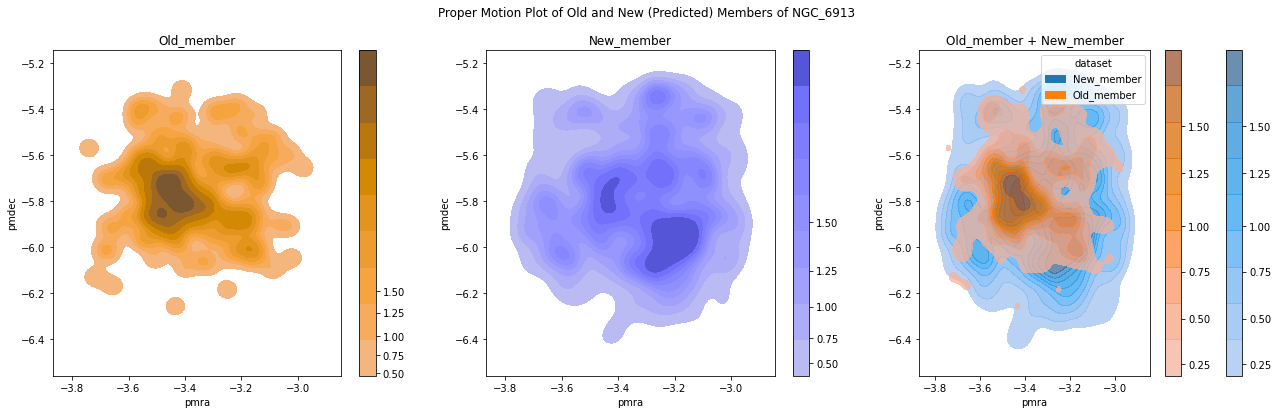

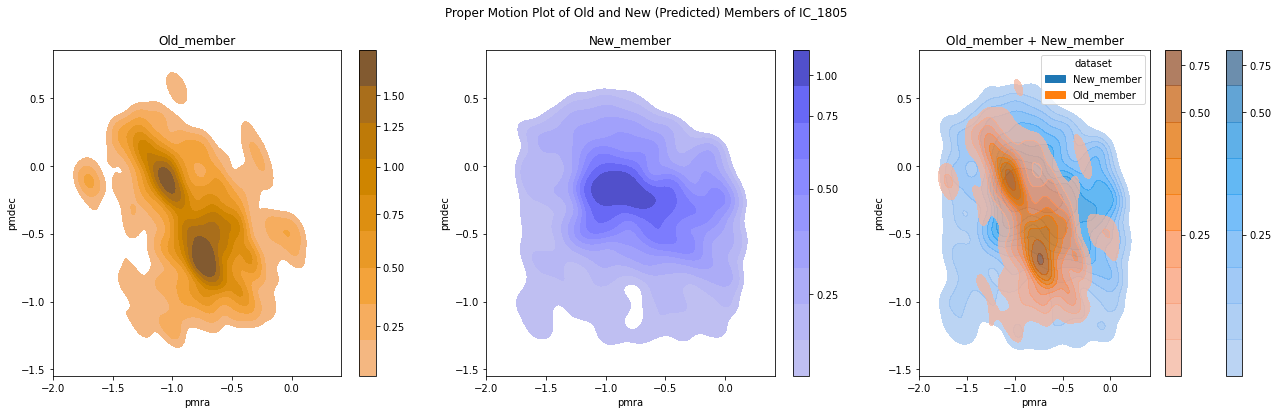

In [23]:
## Proper motion plot
for i in range(9):
    fig, axes = plt.subplots(1, 3, figsize=(22,6))
    fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of '+clusters[i])
    
    cbar_kws = { 'ticks' : np.linspace(0, 1.5, 7)}
    
    old = sns.kdeplot(x='pmra', y='pmdec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[0], cbar_kws = cbar_kws)
    axes[0].set_title('Old_member')
    
    new = sns.kdeplot(x='pmra', y='pmdec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[1], cbar_kws = cbar_kws)
    axes[1].set_title('New_member')
    
    together = sns.kdeplot(x='pmra', y='pmdec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[2], cbar_kws = cbar_kws, hue = 'dataset', alpha = 0.75)
    axes[2].set_title('Old_member + New_member')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
    plt.show()####

In [63]:
np.append(np.linspace(0, 2, 9),(3,4,5,6))

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 3.  , 4.  ,
       5.  , 6.  ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

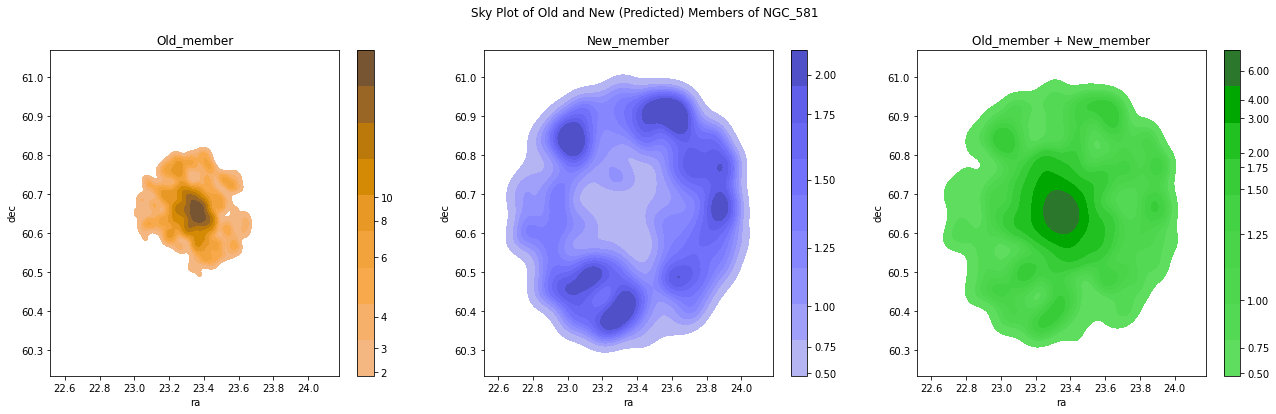

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

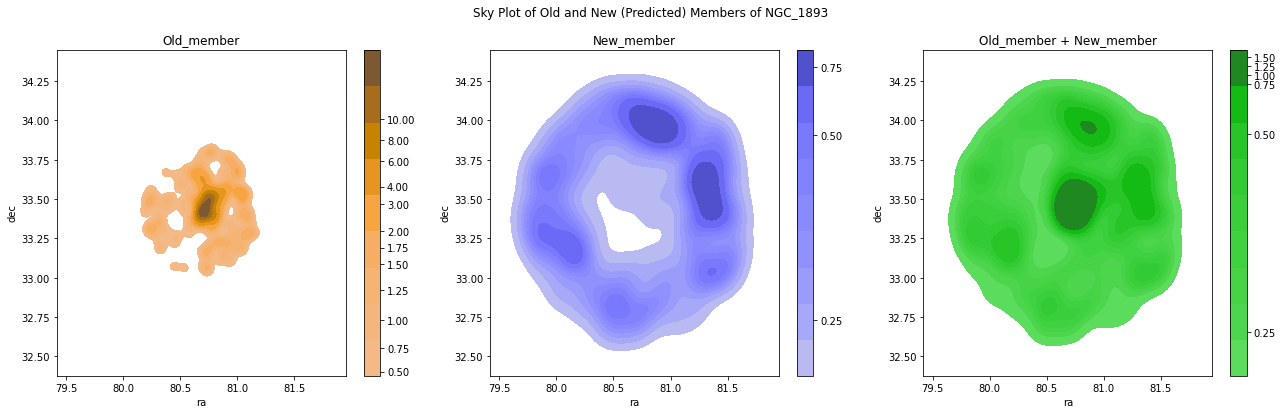

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

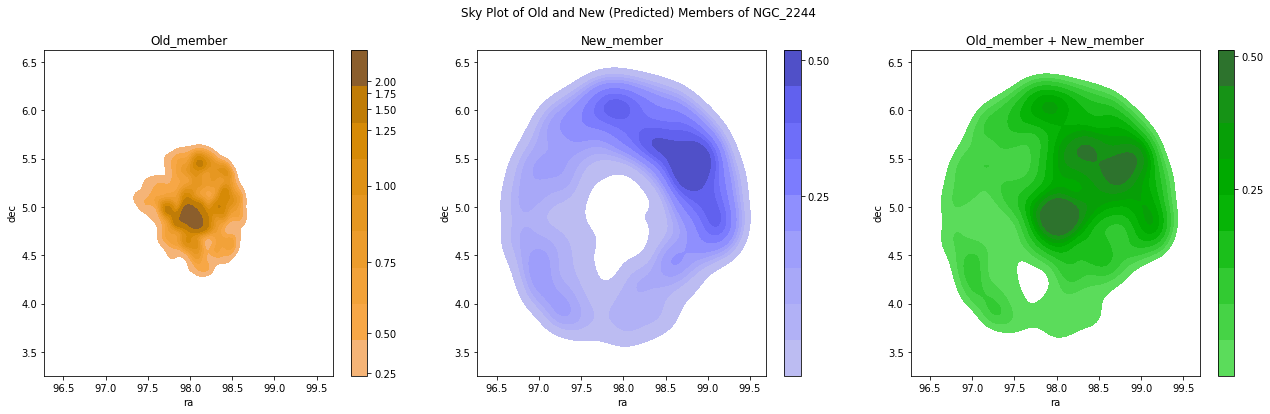

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

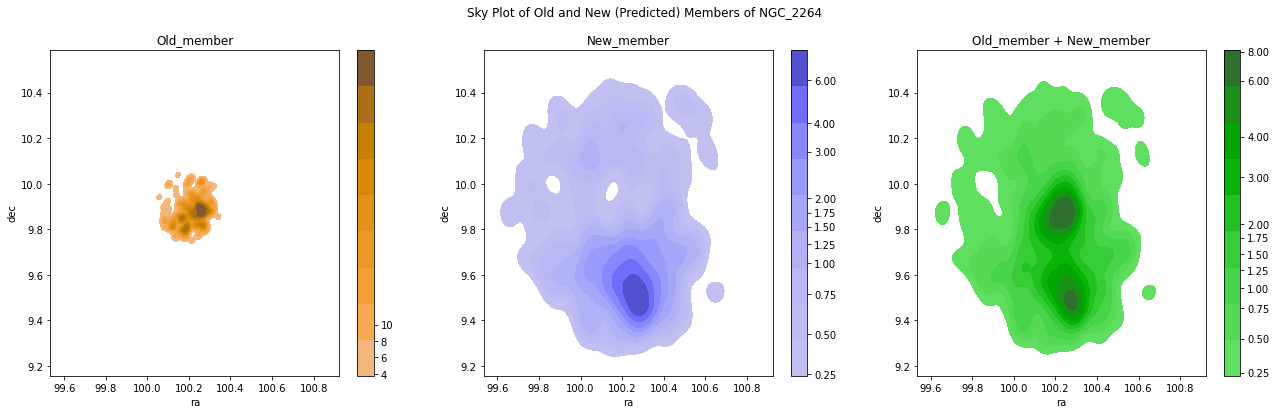

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

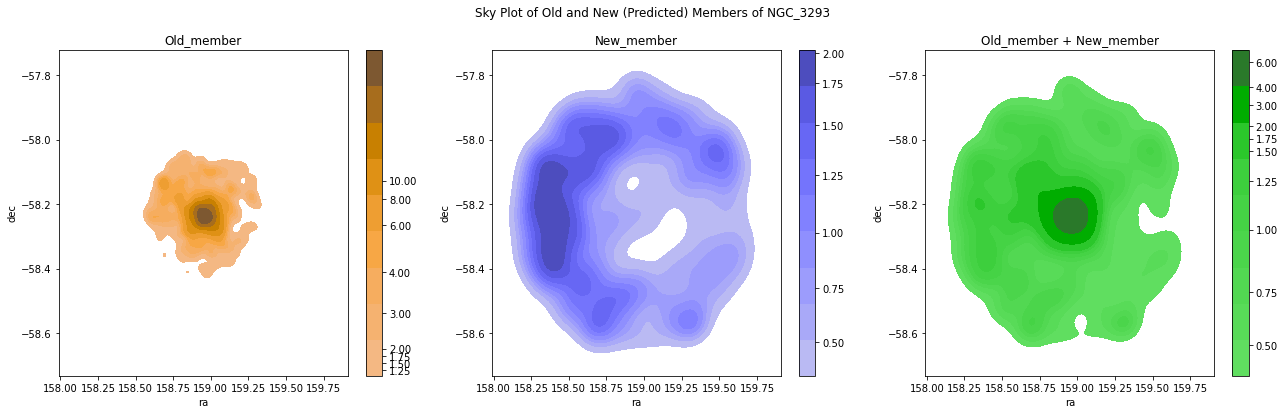

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

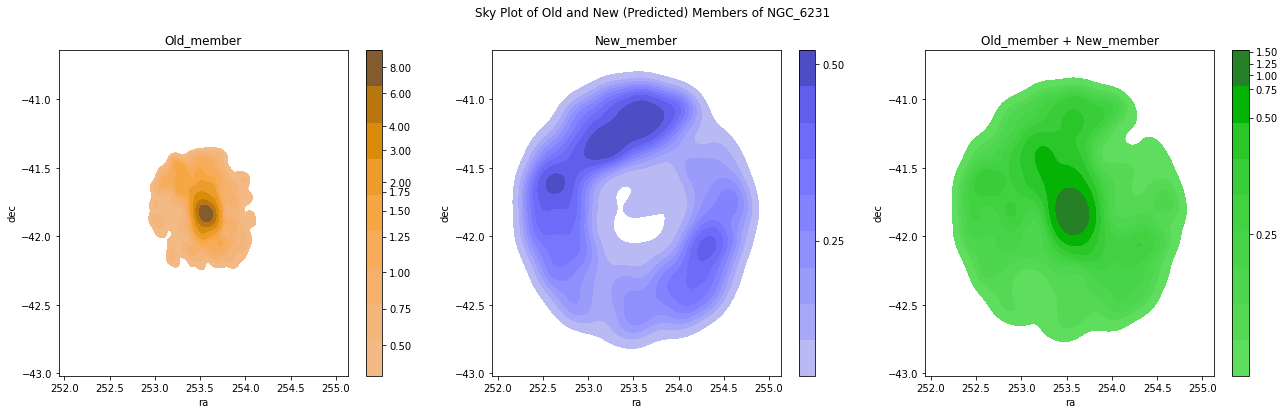

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

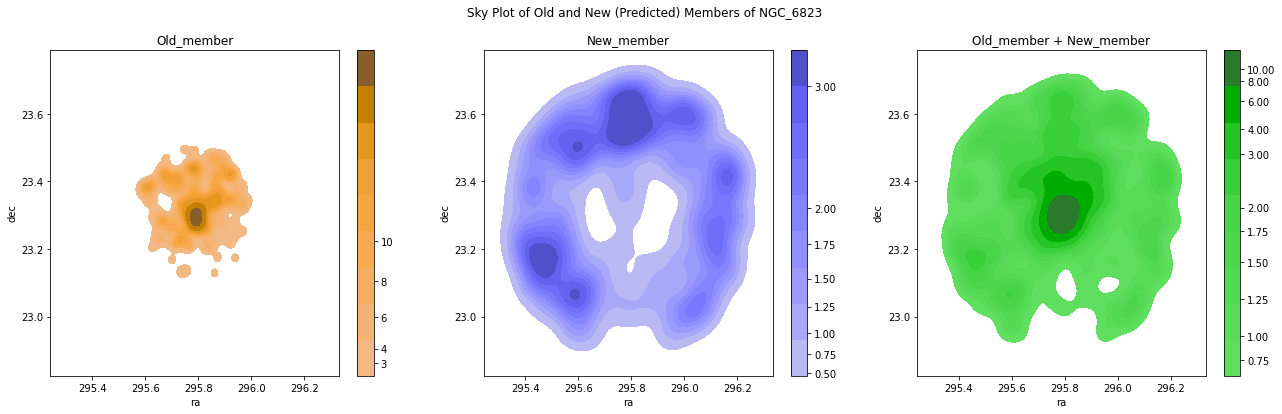

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

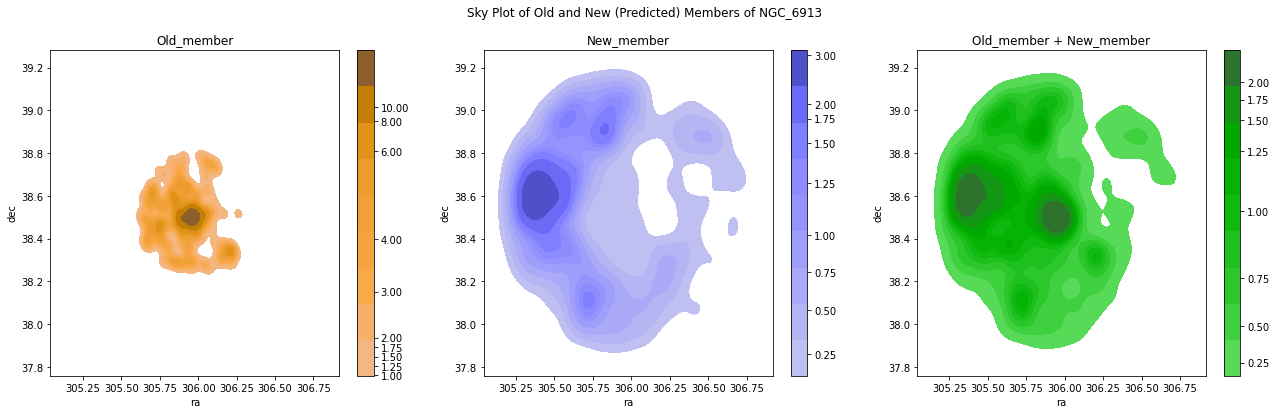

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

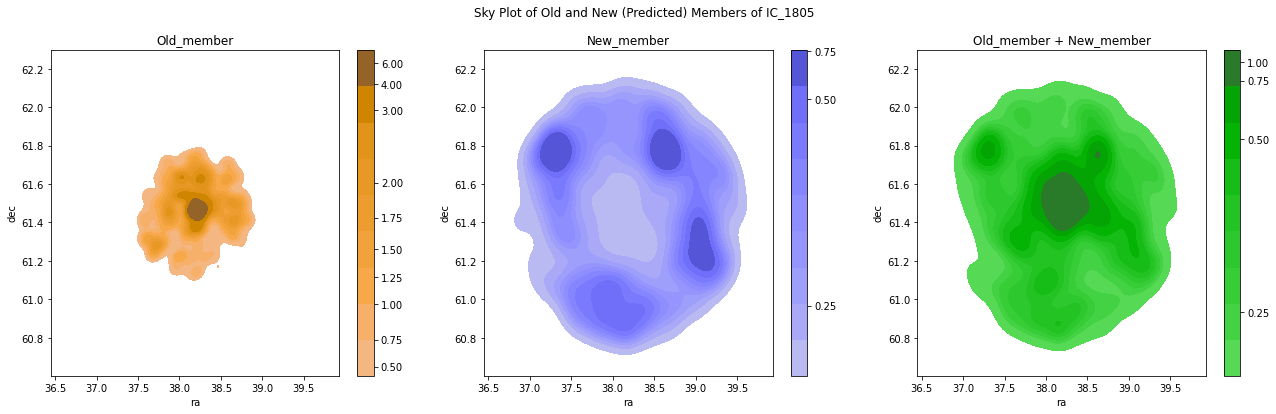

In [67]:
#### skyplot

## Proper motion plot
for i in range(9):
    fig, axes = plt.subplots(1, 3, figsize=(22,6))
    fig.suptitle('Sky Plot of Old and New (Predicted) Members of '+clusters[i])
    
    cbar_kws = { 'ticks' : np.append(np.linspace(0, 2, 9),(3,4,6,8,10))}
    
    old = sns.kdeplot(x='ra', y='dec', data = old_members[i], shade=True, color = 'orange',
                bw_method = 0.20, cbar=True, ax=axes[0], cbar_kws = cbar_kws)
    axes[0].set_title('Old_member')
    
    new = sns.kdeplot(x='ra', y='dec', data = new_members[i], shade=True, color = 'blue',
                bw_method = 0.20, cbar=True, ax=axes[1], cbar_kws = cbar_kws)
    axes[1].set_title('New_member')
    
    together = sns.kdeplot(x='ra', y='dec', data = members[i], shade=True, color = 'g',
                bw_method = 0.20, cbar=True, ax=axes[2], cbar_kws = cbar_kws)
    axes[2].set_title('Old_member + New_member')
    
    xlim, ylim = together.get_xlim(), together.get_ylim()
    old.set_xlim(xlim)
    old.set_ylim(ylim)
    new.set_xlim(xlim)
    new.set_ylim(ylim)
    
    plt.savefig('skyplot_'+ clusters[i]+'.png')
    files.download('skyplot_'+ clusters[i]+'.png')
    plt.show()

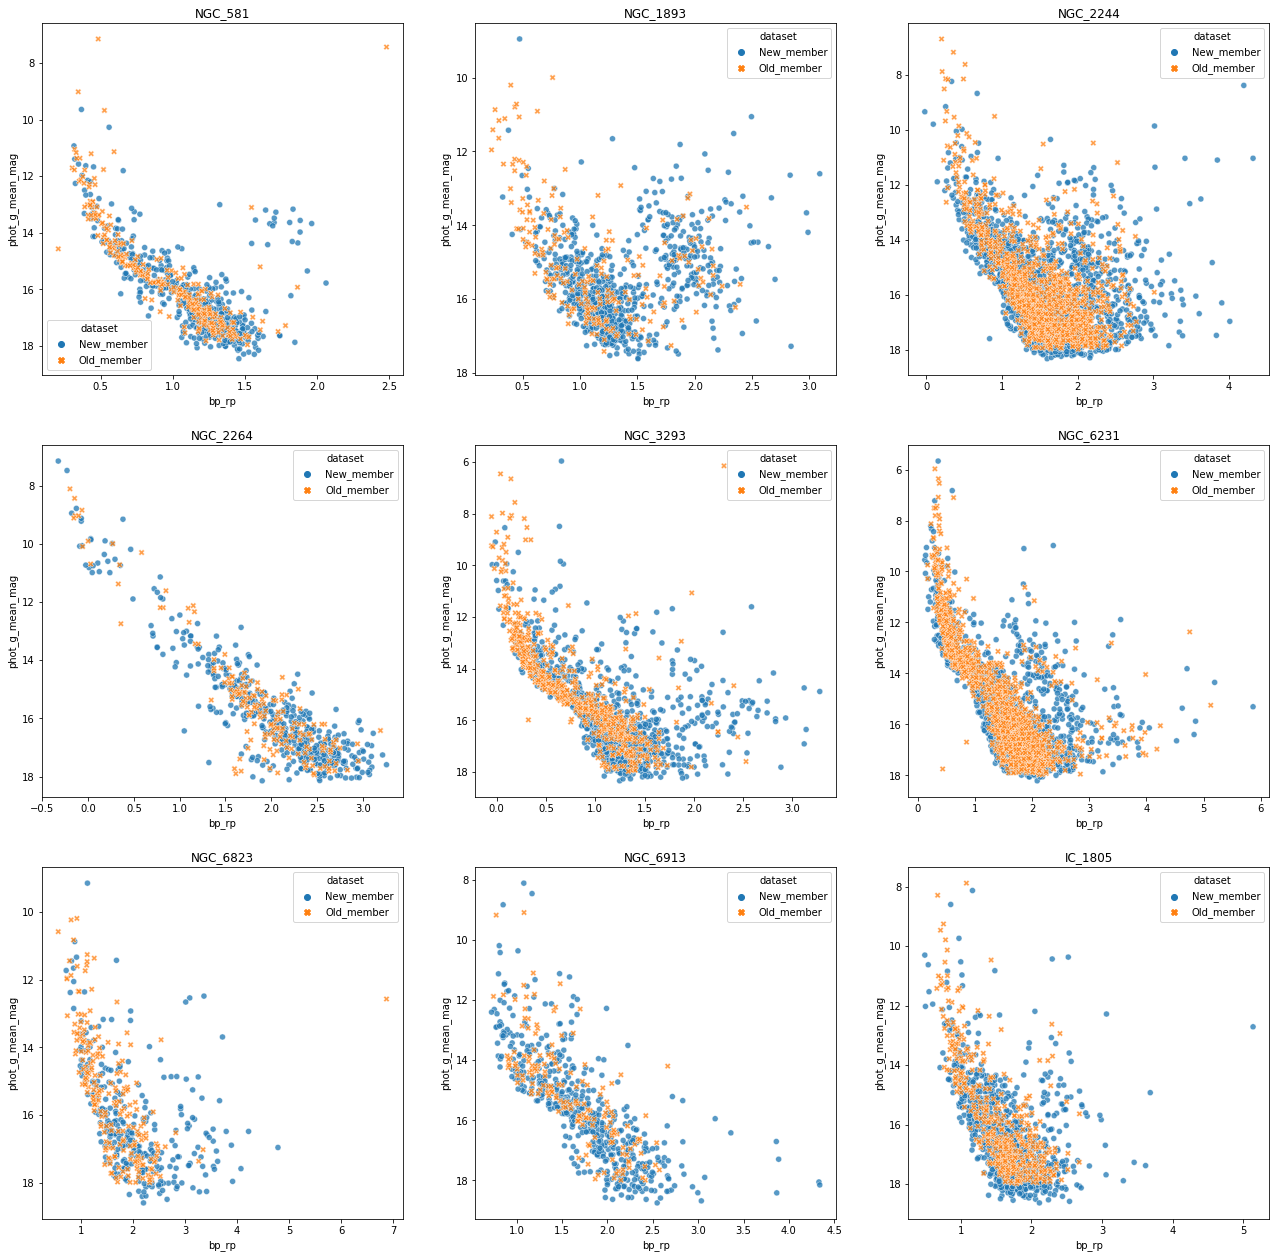

In [48]:
#CMD:

fig, axes = plt.subplots(3, 3, figsize=(22,22))
#fig.suptitle('Color-Magnitude Diagram For All Nine Clusters', fontsize = 15)
for i in range(3):
    cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=members[i], 
                          hue='dataset', style = 'dataset', ax = axes[0,i], alpha = 0.75)
    cmd.invert_yaxis()
    axes[0,i].set_title(clusters[i])

for i in range(3,6):
    cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=members[i], 
                          hue='dataset', style = 'dataset', ax = axes[1,i-3], alpha = 0.75)
    cmd.invert_yaxis()
    axes[1,i-3].set_title(clusters[i])

for i in range(6,9):
    cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=members[i], 
                          hue='dataset', style = 'dataset', ax = axes[2,i-6], alpha = 0.75)
    cmd.invert_yaxis()
    axes[2,i-6].set_title(clusters[i])

plt.show()
    

AttributeError: ignored

#### Making one CSV

In [ ]:
NGC_1893 = pd.read_csv('NGC_1893_all_member_prob.csv')
NGC_2244 = pd.read_csv('NGC_2244_all_member_prob.csv')
NGC_2264 = pd.read_csv('NGC_2264_all_member_prob.csv')
NGC_3293 = pd.read_csv('NGC_3293_all_member_prob.csv')
NGC_581 = pd.read_csv('NGC_581_all_member_prob.csv')
NGC_6231 = pd.read_csv('NGC_6231_all_member_prob.csv')
NGC_6823 = pd.read_csv('NGC_6823_all_member_prob.csv')
NGC_6913 = pd.read_csv('NGC_6913_all_member_prob.csv')
IC_1805 = pd.read_csv('IC_1805_all_member_prob.csv')

In [ ]:
clusters = ['NGC_581', 'NGC_1893', 'NGC_2244', 'NGC_2264', 'NGC_3293', 'NGC_6231', 'NGC_6823', 'NGC_6913', 'IC_1805']
members = [NGC_581, NGC_1893, NGC_2244, NGC_2264, NGC_3293, NGC_6231, NGC_6823, NGC_6913, IC_1805]

all_members = pd.concat([member.assign(cluster=cluster) for member, cluster in zip(members, clusters)])


In [ ]:
[len(member) for member in members]

[815, 992, 4235, 693, 1706, 4073, 524, 678, 1534]

In [ ]:
pprint.pprint([(cluster, member.dataset.value_counts()) for cluster, member in zip(clusters, members)])

[('NGC_581', New_member    525
Old_member    290
Name: dataset, dtype: int64),
 ('NGC_1893', New_member    774
Old_member    218
Name: dataset, dtype: int64),
 ('NGC_2244',
  New_member    3043
Old_member    1192
Name: dataset, dtype: int64),
 ('NGC_2264', New_member    514
Old_member    179
Name: dataset, dtype: int64),
 ('NGC_3293',
  New_member    1089
Old_member     617
Name: dataset, dtype: int64),
 ('NGC_6231',
  New_member    2719
Old_member    1354
Name: dataset, dtype: int64),
 ('NGC_6823', New_member    304
Old_member    220
Name: dataset, dtype: int64),
 ('NGC_6913', New_member    508
Old_member    170
Name: dataset, dtype: int64),
 ('IC_1805', New_member    1104
Old_member     430
Name: dataset, dtype: int64)]


In [ ]:
all_members.cluster.value_counts()

NGC_2244    4235
NGC_6231    4073
NGC_3293    1706
IC_1805     1534
NGC_1893     992
NGC_581      815
NGC_2264     693
NGC_6913     678
NGC_6823     524
Name: cluster, dtype: int64

In [ ]:
all_members.PMemb

0       0.591706
1       0.830878
2       0.865941
3       0.583345
4       0.547995
          ...   
1529    0.300000
1530    0.600000
1531    0.300000
1532    0.100000
1533    0.100000
Name: PMemb, Length: 15250, dtype: float64

In [ ]:
all_members.to_csv("all_possible_members.csv")

In [ ]:
files.download('all_possible_members.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
members[1]

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,...,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member,PMemb,dataset
0,1626,1635721458409799680,Gaia DR2 181177736482225280,181177736482225280,1210589277,2015.5,80.609012,0.031108,33.473863,0.023732,0.342611,0.033856,10.119613,0.534205,0.056720,-1.797387,0.040272,-0.238998,0.316242,-0.142332,0.425297,-0.372457,0.292854,-0.320301,0.176672,0.261558,-0.073260,159,0,159,0,-3.482559,100.109150,0.000000,0.000000e+00,31,False,52.841034,1.570806,0.006578,...,0.964249,0.390146,0.574102,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.498570,-1.696380,82.048602,10.293429,100001.0,5327.3750,5003.9300,5405.0000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,4.585410,4.454647,5.197353,15.258228,11.700645,18.815811,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.087797,9.418264,44.631522,0.087773,1,0.756667,New_member
1,1725,1635721458409799680,Gaia DR2 180985768624207744,180985768624207744,1525125522,2015.5,80.771703,0.033278,33.359300,0.028242,0.230972,0.038422,6.011426,0.576691,0.063874,-2.050521,0.047840,0.022842,0.241886,-0.290334,0.065405,-0.361352,-0.068947,-0.591132,0.193716,0.358462,0.124910,118,0,118,0,0.635036,122.114655,0.000000,9.452920e-16,31,False,72.990350,1.421385,0.007636,...,1.801001,0.876133,0.924869,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.669938,-1.649229,82.178685,10.170232,100001.0,4186.6200,3928.0000,4709.3600,1.0590,0.7236,1.8264,0.5300,0.3470,0.9121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.090514,9.028588,42.862203,0.090541,1,0.866667,New_member
2,2492,1635721458409799680,Gaia DR2 181178389317231616,181178389317231616,323389301,2015.5,80.622089,0.047196,33.514012,0.034057,0.223269,0.052008,4.292998,-0.886567,0.084557,-0.591906,0.059735,-0.329724,0.388104,-0.142417,0.310981,-0.326578,0.145690,-0.499118,0.205965,0.350603,-0.233788,170,170,166,4,8.631196,369.693360,0.000000,0.000000e+00,31,True,236.698090,1.660706,0.010277,...,0.472369,0.175611,0.296759,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.471648,-1.664651,82.062352,10.332772,100001.0,7168.0000,7065.0000,7518.6665,0.7610,0.3693,0.9471,0.3680,0.2006,0.4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.114355,10.484819,9.908898,0.114334,1,0.936667,New_member
3,2606,1635721458409799680,Gaia DR2 181175567521642624,181175567521642624,1030553677,2015.5,80.799476,0.039196,33.479296,0.031341,0.408917,0.041799,9.783020,-0.226399,0.082798,-2.418058,0.057677,-0.212382,-0.095782,-0.407912,0.288680,-0.222697,0.288397,-0.547951,0.239534,0.232857,-0.318789,139,0,139,0,-1.646978,108.226524,0.000000,8.680661e-16,31,False,27.185555,1.574408,0.008637,...,1.012631,0.391842,0.620789,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.583996,-1.562302,82.210084,10.288476,100001.0,5357.4000,5167.0923,5803.3765,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,2.741299,2.336163,2.946946,5.577298,4.286381,6.868215